In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split as tts,cross_val_score,ShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows',None)
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly_express as px

In [2]:
master_df=pd.read_csv("master_df.csv")

In [3]:
master_df

,Unnamed: 0,Cust Type,Customer No.,State,Gate Pass Time,Invoice No,KMs Reading,Labour Total,Make,Model,Order Type,Plant,Print Status,Business Partner,Partner Type,Data Origin,Title,City,Regn State,Invoice Date-Invoice Time,JobCard Date-JobCard Time,Year,Month,Total_Expense,Job_duration(in hrs)
0,0,retail,67849,maharashtra,00:00:00,7005200002,49317,1203.14,general motors,spark,paid service,bc01,no,71941,Retail,Used Car Dealer,2.0,thane,Karnataka,2015-01-02 11:30:36,2014-12-13 14:29:43,2015,1,6900.76,477.014722
1,1,retail,84419,maharashtra,00:00:00,7005200003,78584,804.26,tata,indica,smc value package,bc01,no,89441,Retail,Camp-Outdoor,2.0,thnae,Maharashtra,2015-01-03 10:07:32,2015-01-02 14:12:18,2015,1,1198.32,19.920556
2,2,retail,81055,maharashtra,00:00:00,7005200004,33985,180.19,maruti,zen,running repairs,bc01,no,85849,Retail,Ref-Customer,2.0,thane[w],Andhra Pradesh,2015-01-03 11:12:57,2015-01-02 11:40:44,2015,1,286.09,23.536944
3,3,retail,84419,maharashtra,00:00:00,7005200005,78584,0.00,tata,indica,smc redemption,bc01,no,89441,Retail,Camp-Outdoor,2.0,thnae,Maharashtra,2015-01-03 11:40:44,2015-01-03 10:12:32,2015,1,0.00,1.470000
4,4,retail,18980,maharashtra,00:00:00,7005200006,50057,1202.97,hyundai,santro xing,paid service,bc01,no,20291,Retail,Ref-Customer,2.0,thane,Maharashtra,2015-01-03 12:07:17,2015-01-02 10:45:42,2015,1,4291.27,25.359722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479544,492051,retail,203820,tamil nadu,00:00:00,7231000017,72546,2495.90,maruti,alto,paid service,x405,no,214278,Retail,Newspaper AD,2.0,chennai,Tamil Nadu,2016-06-30 14:56:58,2016-06-30 09:15:12,2016,6,6420.40,5.696111
479545,492052,retail,170411,tamil nadu,00:00:00,7231000018,18968,2443.47,nissan,micra,paid service,x405,no,179429,Retail,Ref-Employee,2.0,chennai,Tamil Nadu,2016-06-30 15:06:52,2016-06-30 08:42:15,2016,6,11220.69,6.410278
479546,492053,retail,48811,tamil nadu,00:00:00,7231000019,177433,2598.92,mahindra,scorpio crde,paid service,x405,no,52039,Retail,Spotted outlet,2.0,chennai,Tamil Nadu,2016-06-30 15:43:56,2016-06-30 08:27:51,2016,6,15776.50,7.268056
479547,492054,retail,204067,tamil nadu,00:00:00,7231000020,22932,11000.00,honda,amaze,accidental,x405,no,214514,Retail,Spotted outlet,2.0,chennai,Tamil Nadu,2016-06-30 15:58:59,2016-06-30 12:53:48,2016,6,11200.00,3.086389


In [4]:
(master_df.Make=="premierauto").value_counts()

False    479462
True         87
Name: Make, dtype: int64

In [5]:
master_df[master_df['Job_duration(in hrs)']<0]

,Unnamed: 0,Cust Type,Customer No.,State,Gate Pass Time,Invoice No,KMs Reading,Labour Total,Make,Model,Order Type,Plant,Print Status,Business Partner,Partner Type,Data Origin,Title,City,Regn State,Invoice Date-Invoice Time,JobCard Date-JobCard Time,Year,Month,Total_Expense,Job_duration(in hrs)
351463,358893,retail,182085,tamil nadu,00:00:00,7167000988,62001,0.0,maruti,swift dzire,running repairs,x085,no,191639,Retail,Camp-Outdoor,1.0,chengalpattu,Tamil Nadu,2016-05-02 15:12:11,2016-05-02 15:12:44,2016,5,0.0,-0.009167


In [6]:
master_df.drop(index=351463,axis=0,inplace=True)

In [7]:
master_df.Year.value_counts()

2016    190826
2015    122142
2014     93706
2013     54852
2012     18022
Name: Year, dtype: int64

### Calculation of Life Time Value for each customer over a period of 2015 (1 year) based on "Make" and "Model" of the cars

In [8]:
year_15=master_df[master_df["Year"]==2016]

In [9]:
year_15.drop(["Unnamed: 0"],1,inplace=True)

In [10]:
year_15.head(2)

,Cust Type,Customer No.,State,Gate Pass Time,Invoice No,KMs Reading,Labour Total,Make,Model,Order Type,Plant,Print Status,Business Partner,Partner Type,Data Origin,Title,City,Regn State,Invoice Date-Invoice Time,JobCard Date-JobCard Time,Year,Month,Total_Expense,Job_duration(in hrs)
288722,retail,119371,maharashtra,15:41:33,7005202789,35654,1125.76,maruti,zen estilo,smc value package,bc01,yes,126260,Retail,Ref-Customer,2.0,bhandup,Maharashtra,2016-01-02 11:27:27,2016-01-02 10:52:24,2016,1,5872.80,0.584167
288723,retail,128929,maharashtra,13:05:33,7005202790,70730,233.85,maruti,swift,running repairs,bc01,yes,136299,Retail,Camp-Outdoor,2.0,thane,Maharashtra,2016-01-02 13:03:16,2016-01-02 11:50:58,2016,1,624.73,1.205000


In [11]:
# Calculating frequency of visits & total revenue of a customer for calculation of ltv

customer_freq=year_15.groupby(["Make","Model","City","Customer No."]).agg({"Invoice No":'nunique',"Total_Expense":'mean',"Job_duration(in hrs)":'mean'})
customer_freq=customer_freq.reset_index()

customer_freq.head(10)

,Make,Model,City,Customer No.,Invoice No,Total_Expense,Job_duration(in hrs)
0,audi,a4,ahmednagar,129425,1,1921.400,361.850833
1,audi,a4,bengaluru,197826,1,0.000,839.515278
2,audi,a4,bhubaneswar,259799,1,330.500,0.056944
3,audi,a4,chennai,251998,1,243275.150,359.626667
4,audi,a4,dharmapuri,99532,5,7304.606,60.879889
5,audi,a4,ghazibad,141369,1,497.780,1.346111
6,audi,a4,indore,158521,3,23460.480,31.365926
7,audi,a4,indore,238765,2,59167.160,145.511389
8,audi,a4,kakinada,182988,2,479.380,12.871528
9,audi,a4,kakinada,243916,1,1478.300,4.828611


In [12]:
ltv_make_model_r=customer_freq.copy()
ltv_make_model_r["LTV"] = ltv_make_model_r["Invoice No"] * ltv_make_model_r["Total_Expense"]
ltv_make_model_r.head()

,Make,Model,City,Customer No.,Invoice No,Total_Expense,Job_duration(in hrs),LTV
0,audi,a4,ahmednagar,129425,1,1921.400,361.850833,1921.40
1,audi,a4,bengaluru,197826,1,0.000,839.515278,0.00
2,audi,a4,bhubaneswar,259799,1,330.500,0.056944,330.50
3,audi,a4,chennai,251998,1,243275.150,359.626667,243275.15
4,audi,a4,dharmapuri,99532,5,7304.606,60.879889,36523.03


In [13]:
ltv_make_model_r.groupby(["Customer No."])["LTV"].max().sort_values(ascending=False)

Customer No.
412       2830476.96
164806    1896690.03
151790    1454951.78
84810     1435610.96
172936    1364691.27
             ...    
250878          0.00
240607          0.00
204635          0.00
240602          0.00
190909          0.00
Name: LTV, Length: 126804, dtype: float64

#  # Filtering customer having LTV/Total revenue > 0


In [14]:
ltv_make_model_r = ltv_make_model_r[ltv_make_model_r['LTV'] > 0]

In [15]:
ltv_make_model_r.shape

(120884, 8)

### Quantile based analysis of LTV to decide threshold

In [16]:
print("0.05 quantile :-",ltv_make_model_r['LTV'].quantile(0.05))
print("0.25 quantile :-",ltv_make_model_r['LTV'].quantile(0.25))
print("0.50 quantile :-",ltv_make_model_r['LTV'].quantile(0.50))
print("0.75 quantile :-",ltv_make_model_r['LTV'].quantile(0.75))
print("0.95 quantile :-",ltv_make_model_r['LTV'].quantile(0.95))
print("minimum LTV :-",ltv_make_model_r['LTV'].min())
print("maximum LTV :-",ltv_make_model_r['LTV'].max())
print("mean LTV :-",ltv_make_model_r['LTV'].mean())

0.05 quantile :- 101.0
0.25 quantile :- 578.5825000000001
0.50 quantile :- 3523.33
0.75 quantile :- 10483.044999999998
0.95 quantile :- 45400.076999999954
minimum LTV :- 0.01
maximum LTV :- 2830476.9600000004
mean LTV :- 11330.93831193581


In [17]:
print(ltv_make_model_r[ltv_make_model_r["LTV"]<=4743.35].shape)
print(ltv_make_model_r[(ltv_make_model_r["LTV"]>4743.35)&(ltv_make_model_r["LTV"]<=13643.22)].shape)
print(ltv_make_model_r[ltv_make_model_r["LTV"]>13643.22].shape)

(68627, 8)
(28105, 8)
(24152, 8)


In [18]:
bins=[-1,4743.35,13643.22,3218304.520000001]
labels=["Low","Medium","High"]
ltv_make_model_r["LTV Category"]=pd.cut(ltv_make_model_r["LTV"], bins=bins, labels=labels)

In [19]:
ltv_make_model_r

,Make,Model,City,Customer No.,Invoice No,Total_Expense,Job_duration(in hrs),LTV,LTV Category
0,audi,a4,ahmednagar,129425,1,1921.400,361.850833,1921.40,Low
2,audi,a4,bhubaneswar,259799,1,330.500,0.056944,330.50,Low
3,audi,a4,chennai,251998,1,243275.150,359.626667,243275.15,High
4,audi,a4,dharmapuri,99532,5,7304.606,60.879889,36523.03,High
5,audi,a4,ghazibad,141369,1,497.780,1.346111,497.78,Low
...,...,...,...,...,...,...,...,...,...
129521,volvo,volvo xc90,indore,256290,1,1480.000,6.383056,1480.00,Low
129522,volvo,volvo xc90,madurai,233657,1,1391.340,71.085833,1391.34,Low
129523,volvo,volvo xc90,palani,241519,1,11088.640,1.053333,11088.64,Medium
129524,volvo,volvo xc90,thane,148692,1,5243.440,0.184444,5243.44,Medium


In [20]:
ltv_make_model_r["LTV Category"].value_counts(dropna=False)

Low       68627
Medium    28105
High      24152
Name: LTV Category, dtype: int64

In [21]:
ltv_make_model_r["LTV Category"].dtypes

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)

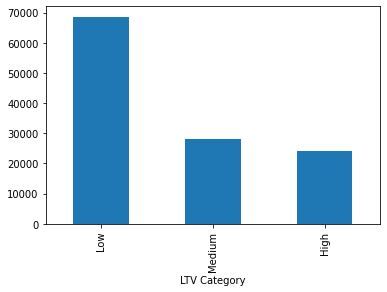

In [22]:
ltv_make_model_r.groupby('LTV Category').size().plot(kind='bar')

In [23]:
# Getting the number of fundings according to year
cnt_srs = ltv_make_model_r["LTV Category"].value_counts()
# sorting the years in ascending order
cnt_srs = cnt_srs.sort_index()
# setting uo the bar graph
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    
)
# setting the layout
layout = go.Layout(
    title=go.layout.Title(
        text="Customer LTV Catogarization",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

In [24]:
ltv_make_model_r.isnull().sum()

Make                    0
Model                   0
City                    0
Customer No.            0
Invoice No              0
Total_Expense           0
Job_duration(in hrs)    0
LTV                     0
LTV Category            0
dtype: int64

In [25]:
temp_ltv_make_model_r=ltv_make_model_r.copy()

In [26]:
temp_ltv_make_model_r

,Make,Model,City,Customer No.,Invoice No,Total_Expense,Job_duration(in hrs),LTV,LTV Category
0,audi,a4,ahmednagar,129425,1,1921.400,361.850833,1921.40,Low
2,audi,a4,bhubaneswar,259799,1,330.500,0.056944,330.50,Low
3,audi,a4,chennai,251998,1,243275.150,359.626667,243275.15,High
4,audi,a4,dharmapuri,99532,5,7304.606,60.879889,36523.03,High
5,audi,a4,ghazibad,141369,1,497.780,1.346111,497.78,Low
...,...,...,...,...,...,...,...,...,...
129521,volvo,volvo xc90,indore,256290,1,1480.000,6.383056,1480.00,Low
129522,volvo,volvo xc90,madurai,233657,1,1391.340,71.085833,1391.34,Low
129523,volvo,volvo xc90,palani,241519,1,11088.640,1.053333,11088.64,Medium
129524,volvo,volvo xc90,thane,148692,1,5243.440,0.184444,5243.44,Medium


In [27]:
le=LabelEncoder()
temp_ltv_make_model_r["Make"]=le.fit_transform(temp_ltv_make_model_r["Make"])
temp_ltv_make_model_r["Model"]=le.fit_transform(temp_ltv_make_model_r["Model"])
temp_ltv_make_model_r["LTV Category"]=le.fit_transform(temp_ltv_make_model_r["LTV Category"])
temp_ltv_make_model_r["City"]=le.fit_transform(temp_ltv_make_model_r["City"])

In [28]:
X=temp_ltv_make_model_r.drop(["Customer No.","LTV","LTV Category","Invoice No"],1)
y=temp_ltv_make_model_r["LTV Category"]

In [29]:
X

,Make,Model,City,Total_Expense,Job_duration(in hrs)
0,0,8,51,1921.400,361.850833
2,0,8,274,330.500,0.056944
3,0,8,375,243275.150,359.626667
4,0,8,507,7304.606,60.879889
5,0,8,635,497.780,1.346111
...,...,...,...,...,...
129521,26,217,786,1480.000,6.383056
129522,26,217,1077,1391.340,71.085833
129523,26,217,1473,11088.640,1.053333
129524,26,217,2002,5243.440,0.184444


In [30]:
y

0         1
2         1
3         0
4         0
5         1
         ..
129521    1
129522    1
129523    2
129524    2
129525    2
Name: LTV Category, Length: 120884, dtype: int32

In [31]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=0)

### Decision Tree Classifier

In [32]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=0)

dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      7284
           1       0.90      1.00      0.95     20559
           2       0.76      0.77      0.76      8423

    accuracy                           0.88     36266
   macro avg       0.88      0.82      0.84     36266
weighted avg       0.89      0.88      0.88     36266



In [33]:
print("Training Accuracy :-" , accuracy_score(y_test,y_pred_dt))
print("Testing Accuracy :-" ,accuracy_score(y_train,y_pred_dt_train))

Training Accuracy :- 0.8816522362543429
Testing Accuracy :- 0.8826490817556548


<BarContainer object of 5 artists>

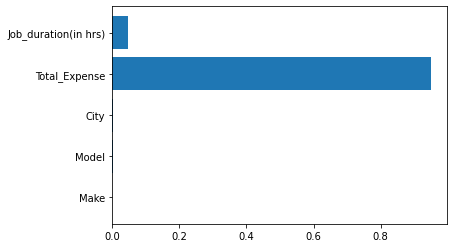

In [34]:
plt.barh(list(X),list(dt.feature_importances_))

In [35]:
### Cross Validation Score

dt_cv_score=cross_val_score(estimator=dt,X=X,y=y,cv=5)

print(dt_cv_score.mean())

0.8568041397031141


### Random Forest Classifier


In [36]:
rfc=RandomForestClassifier(criterion='entropy',max_depth=8,random_state=0)

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [38]:
y_pred_rfc=rfc.predict(X_test)

In [39]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      7284
           1       0.90      1.00      0.95     20559
           2       0.76      0.76      0.76      8423

    accuracy                           0.88     36266
   macro avg       0.88      0.82      0.84     36266
weighted avg       0.89      0.88      0.88     36266



In [40]:
accuracy_score(y_test,y_pred_rfc)

0.8814867920366183

<BarContainer object of 5 artists>

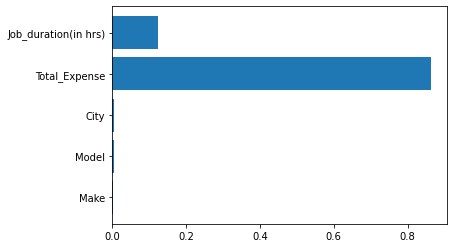

In [41]:
plt.barh(list(X),list(rfc.feature_importances_))

In [42]:
score=cross_val_score(estimator=rfc,X=X,y=y,cv=5)

In [43]:
score.mean()

0.8299940378493306

### XgBoost Classifier

In [44]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
accuracy_score(y_test,y_pred_xgb)
print(classification_report(y_test,y_pred_xgb))


              precision    recall  f1-score   support

           0       1.00      0.68      0.81      7284
           1       0.90      1.00      0.95     20559
           2       0.75      0.77      0.76      8423

    accuracy                           0.88     36266
   macro avg       0.88      0.81      0.84     36266
weighted avg       0.89      0.88      0.88     36266



In [45]:
scores_xgb=cross_val_score(estimator=xgb,X=X,y=y,cv=5)
scores_xgb.mean()

0.8518986150806622